In [1]:
from matplotlib import pyplot as plt
import os
import numpy as np
%matplotlib inline
from matplotlib.offsetbox import AnchoredText
import DSOhelper as dh

## determine the mean height of peaks vs overvoltage

In [2]:
datafolder = "understand_osc_params/"
files = sorted(os.listdir(datafolder))
file=files[0]
files

['20khz_3vpp_01mV_trig2V_m7voffset.CSV',
 '20khz_3vpp_01mV_trig2V_m7voffset_1vscale.CSV',
 '20khz_3vpp_01mV_trig2V_m7voffset_1vscale_10us.CSV',
 '20khz_3vpp_01mV_trig2V_m7voffset_1vscale_20us_100k_200MSa.CSV',
 '20khz_3vpp_01mV_trig2V_m7voffset_1vscale_20us_100k_500MSa.CSV',
 '20khz_9vpp_01mV_trig6V_6Voffset.CSV',
 '20khz_9vpp_01mV_trig6V_m7voffset.CSV']

In [3]:
dataseq,headers=dh.get_oscilloscope_data(f"{datafolder}{file}")

In [4]:
headers[1]["Sampling Period"],headers[1]["Vertical Scale"]

(1e-07, 0.5)

In [5]:
vpos  =headers[1]["Vertical Position"]

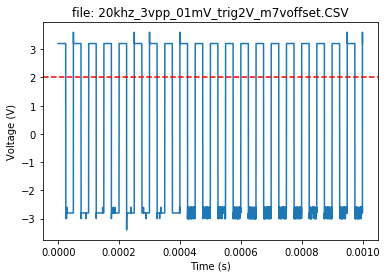

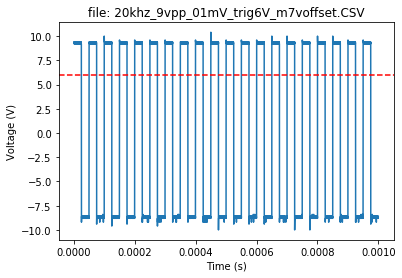

In [6]:
for i,file in enumerate(files[::len(files)-1]):
    dataseq,headers=dh.get_oscilloscope_data(f"{datafolder}{file}")
    CH=2
    samplingperiod = headers[CH]["Sampling Period"]
    plt.figure()
    plt.plot(np.arange(len(dataseq[CH]))*samplingperiod,dh.getvoltage(dataseq[CH],headers[CH]))
    plt.axhline(headers[CH]["Trigger Level"],c="r",ls="--")
    plt.ylabel("Voltage (V)")
    plt.title("file: "+file)
    #plt.ylim(-4*vdiv-vpos,4*vdiv-vpos)
    plt.xlabel("Time (s)")
    plt.savefig(f"results07_{i:02d}calibration.png")

In [7]:
dataseq,headers=dh.get_oscilloscope_data(f"overvoltage_apd2/1443v01_0000040.CSV")

In [9]:
headers[1]

{'Memory Length': 10000.0,
 'IntpDistance': 0.0,
 'Trigger Address': 4999.0,
 'Trigger Level': 0.16,
 'Source': 'CH1',
 'Vertical Units': 'V',
 'Vertical Units Div': 0.0,
 'Vertical Units Extend Div': 16.0,
 'Label': '',
 'Probe Type': 0.0,
 'Probe Ratio': 10.0,
 'Vertical Scale': 0.2,
 'Vertical Position': -0.712,
 'Horizontal Units': 'S',
 'Horizontal Scale': 5e-05,
 'Horizontal Position': 0.0,
 'Horizontal Mode': 'Main',
 'SincET Mode': 'Real Time',
 'Sampling Period': 5e-08,
 'Horizontal Old Scale': 5e-05,
 'Horizontal Old Position': 0.0,
 'Firmware': 'V1.23',
 'Mode': 'Fast'}

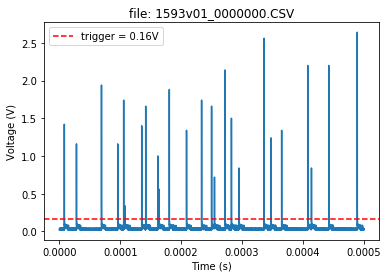

In [10]:
file = "1593v01_0000000.CSV"

dataseq,headers=dh.get_oscilloscope_data(f"overvoltage_apd2/{file}")
CH=1
dh.plot_scope_data("file: "+file,dataseq,headers,CH=CH)